In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## 1. Cargar y explorar datos

Usaremos el dataset Iris con 3 clases de flores.

In [2]:
# Cargar datos
iris = load_iris()
X, y = iris.data, iris.target

print(f"Características: {iris.feature_names}")
print(f"Clases: {iris.target_names}")
print(f"Forma del dataset: {X.shape}")
print(f"\nPrimeras 5 muestras:")
print(X[:5])

Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases: ['setosa' 'versicolor' 'virginica']
Forma del dataset: (150, 4)

Primeras 5 muestras:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## 2. Dividir datos

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 105 muestras
Prueba: 45 muestras


## 3. Entrenar árbol con criterio Gini

La impureza Gini minimiza la probabilidad de clasificación errónea.

In [5]:
# Árbol con Gini
tree_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)
tree_gini.fit(X_train, y_train)

# Predicciones
y_pred_gini = tree_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)

print(f"Accuracy (Gini): {acc_gini:.4f}")

Accuracy (Gini): 0.9778


## 4. Entrenar árbol con criterio Entropía

La entropía maximiza la ganancia de información en cada división.

In [6]:
# Árbol con Entropía
tree_entropy = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)
tree_entropy.fit(X_train, y_train)

# Predicciones
y_pred_entropy = tree_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Accuracy (Entropy): {acc_entropy:.4f}")

Accuracy (Entropy): 0.9333


## 5. Visualizar el árbol (Gini)

Cada nodo muestra:
- La regla de división
- El valor de impureza (gini)
- Número de muestras
- Distribución de clases

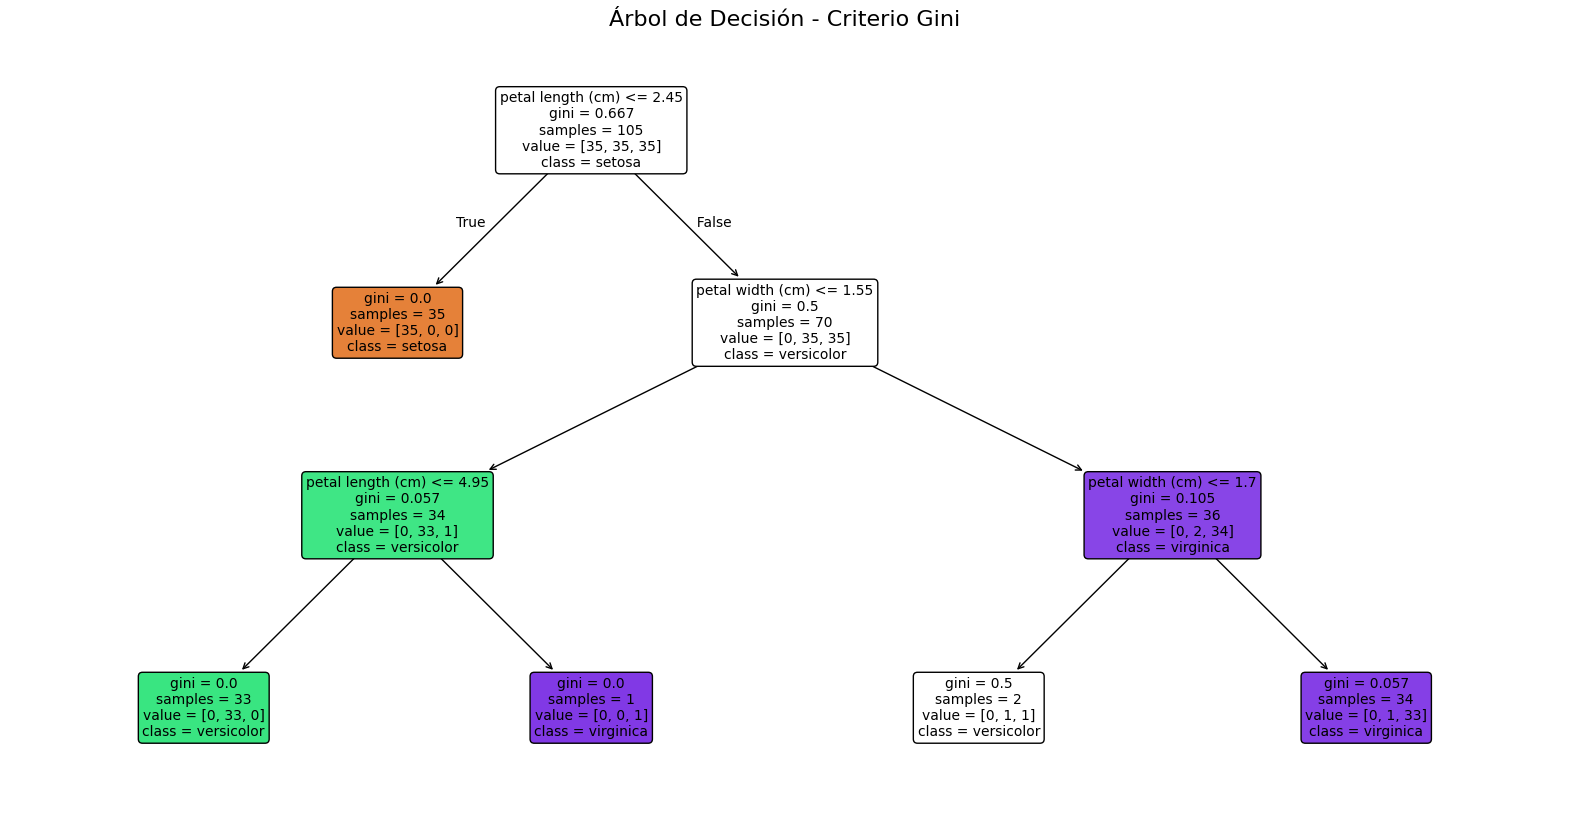

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_gini,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Criterio Gini", fontsize=16)
plt.show()

## 6. Importancia de características

Muestra qué características son más importantes para las decisiones del árbol.

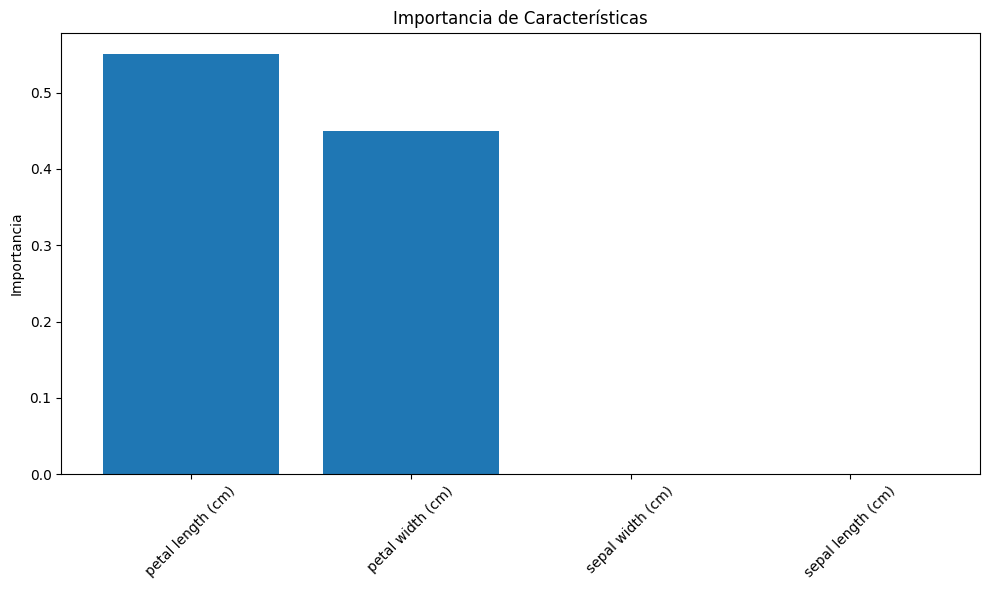


Ranking de características:
1. petal length (cm): 0.5509
2. petal width (cm): 0.4491
3. sepal width (cm): 0.0000
4. sepal length (cm): 0.0000


In [8]:
importances = tree_gini.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importancia")
plt.title("Importancia de Características")
plt.tight_layout()
plt.show()

print("\nRanking de características:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {iris.feature_names[idx]}: {importances[idx]:.4f}")

## 7. Matriz de confusión

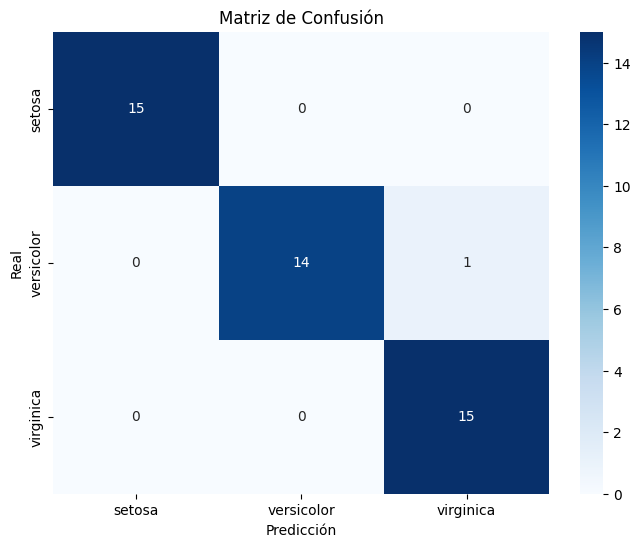


Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [9]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_gini, target_names=iris.target_names))

## 8. Efecto de max_depth (Overfitting)

Comparamos árboles con diferentes profundidades para observar el overfitting.

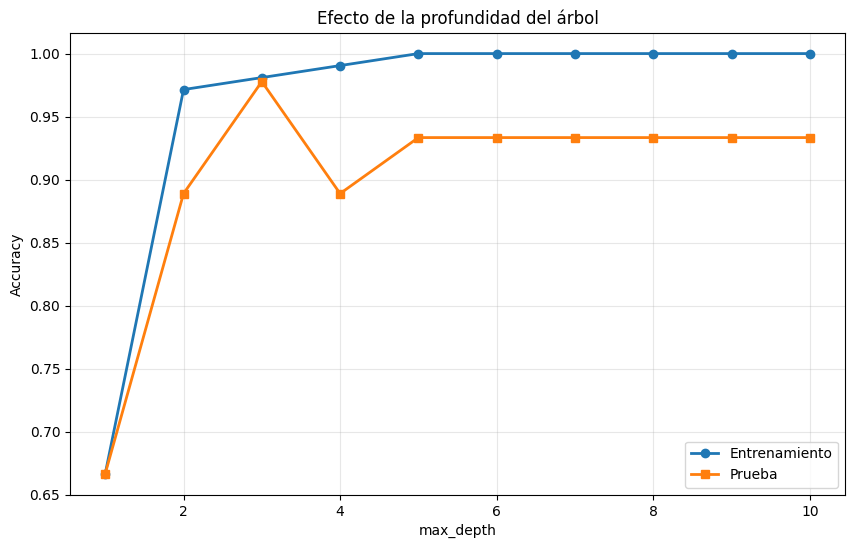


Mejor profundidad según test: 3
Accuracy máximo en test: 0.9778


In [10]:
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Entrenamiento', linewidth=2)
plt.plot(depths, test_scores, 's-', label='Prueba', linewidth=2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Efecto de la profundidad del árbol')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nMejor profundidad según test: {depths[np.argmax(test_scores)]}")
print(f"Accuracy máximo en test: {max(test_scores):.4f}")

## 9. Comparación Gini vs Entropy

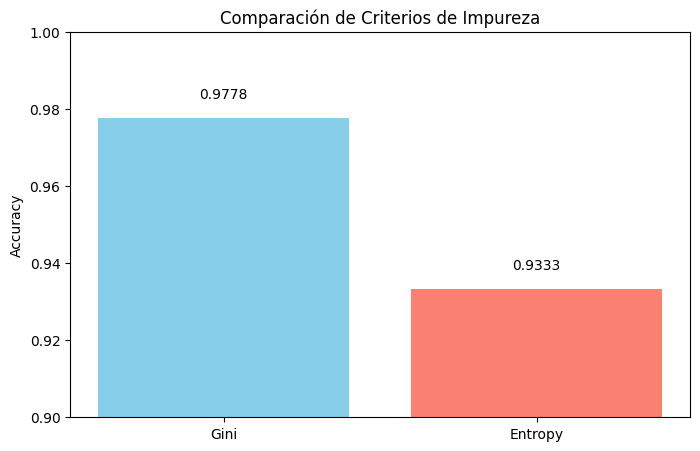


Conclusión: Ambos criterios dan resultados similares en este dataset.


In [11]:
results = {
    'Criterio': ['Gini', 'Entropy'],
    'Accuracy': [acc_gini, acc_entropy]
}

plt.figure(figsize=(8, 5))
plt.bar(results['Criterio'], results['Accuracy'], color=['skyblue', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Comparación de Criterios de Impureza')
plt.ylim([0.9, 1.0])
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')
plt.show()

print("\nConclusión: Ambos criterios dan resultados similares en este dataset.")

## Conclusiones

- **Gini vs Entropy**: En la práctica producen resultados muy similares
- **max_depth**: Limita la profundidad para evitar overfitting
- **Interpretabilidad**: Los árboles de decisión son fáciles de visualizar y entender
- **Sin escalado**: No requieren normalización de características
- **Overfitting**: Árboles profundos tienden a memorizar los datos de entrenamiento